## UNECE Machine Learning Project - VITO Pilot Study
# Energy balance statistics

## Notebook 1. Data preparation

In this notebook: get the [publicly available data](https://doi.org/10.5281/zenodo.3596694) from the Zenodo platform, and prepare the data for analysis. The result is a feather file that is used in the next notebooks.

### Read data

In [1]:
# Read online data file, available at https://doi.org/10.5281/zenodo.3596694

import pandas as pd
EB = pd.read_excel('https://zenodo.org/record/3596695/files/VITO_EnergyBalanceDataML.xlsx', sheet_name = 'quarterly_txt')


print(type(EB)) # should get a pandas DataFrame
EB.shape

<class 'pandas.core.frame.DataFrame'>


(58, 79)

In [3]:
EB.head()

,Variable,Full name,2000Q1,2000Q2,2000Q3,2000Q4,2001Q1,2001Q2,2001Q3,2001Q4,...,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1
0,EnrgCombustibleFuels,+ Combustible Fuels GWh,10108.0,7739.0,6984.0,7982.0,8067.0,7111.0,7578.0,7781.0,...,10051.863,8831.974,7043.783,6427.036,9013.208,7672.179,6178.789,7601.239,10471.301,8681.063
1,EnrgNuclearNuclear,+ Nuclear GWh,11087.0,10770.0,11154.0,12737.0,11539.0,10076.0,9949.0,12442.0,...,8585.162,10463.922,8326.447,11827.880,9510.252,10712.177,7263.675,5456.912,3765.264,9304.936
2,EnrgHydroHydro,+ Hydro GWh,446.0,357.0,397.0,487.0,454.0,418.0,356.0,409.0,...,373.809,415.488,274.864,249.940,420.609,445.831,338.133,188.256,311.535,346.173
3,EnrgGeothermalOther,+ Geothermal/Other GWh,3.0,3.0,3.0,5.0,4.0,8.0,7.0,16.0,...,1833.080,2337.992,2633.542,2432.771,2738.797,3064.768,2917.356,2801.540,3081.319,3374.616
4,EnrgIndigenousProd,=Indigenous Production GWh,21644.0,18869.0,18538.0,21211.0,20064.0,17613.0,17890.0,20648.0,...,20843.914,22049.376,18278.636,20937.627,21682.866,21894.955,16697.953,16047.947,17629.419,21706.788


Which variables does the file contain?

In [2]:
EB[['Variable', 'Full name']]

,Variable,Full name
0,EnrgCombustibleFuels,+ Combustible Fuels GWh
1,EnrgNuclearNuclear,+ Nuclear GWh
2,EnrgHydroHydro,+ Hydro GWh
3,EnrgGeothermalOther,+ Geothermal/Other GWh
4,EnrgIndigenousProd,=Indigenous Production GWh
5,EnrgImportsImports,+ Imports GWh
6,EnrgExportsExports,- Exports GWh
7,EnrgElectricitySupplied,= Electricity Supplied GWh
8,DegreeDays,Graaddagen
9,GrossDomInc,Gross domestic income


### Create new data frame for analysis

Construct a new data frame with one row per year.

In [3]:
names = list(EB['Variable'])

In [4]:
data = EB.transpose()
data = data.iloc[2:data.shape[0]] # row 0 and 1 are names
data = data.astype(float)
data.columns = names
data.shape

(77, 58)

In [5]:
data.head()

,EnrgCombustibleFuels,EnrgNuclearNuclear,EnrgHydroHydro,EnrgGeothermalOther,EnrgIndigenousProd,EnrgImportsImports,EnrgExportsExports,EnrgElectricitySupplied,DegreeDays,GrossDomInc,...,GDPGroFixFoHh,GDPGroFixFoPub,GDPChStocks,GDPChInven,GDPAcqui,GDPExtBGoServ,GDPExpor,GDPImpor,Population,SunSpots
2000Q1,10108.0,11087.0,446.0,3.0,21644.0,2420.0,1563.0,22501.0,988.0,62261.4,...,2901.0,1551.0,1503.0,1498.0,5.0,1879.0,44573.0,42695.0,10242.0,172.166667
2000Q2,7739.0,10770.0,357.0,3.0,18869.0,3023.0,1788.0,20104.0,290.0,65046.1,...,3203.0,1574.0,1600.0,1593.0,7.0,1704.0,46243.0,44538.0,10245.0,181.800000
2000Q3,6984.0,11154.0,397.0,3.0,18538.0,2934.0,2019.0,19453.0,75.0,62753.6,...,3062.0,1558.0,1288.0,1280.0,8.0,1070.0,45093.0,44024.0,10253.0,193.600000
2000Q4,7982.0,12737.0,487.0,5.0,21211.0,3267.0,1950.0,22528.0,744.0,68160.5,...,3029.0,1587.0,-1055.0,-1063.0,8.0,2155.0,49643.0,47488.0,10265.0,147.666667
2001Q1,8067.0,11539.0,454.0,4.0,20064.0,3990.0,1035.0,23019.0,1048.0,64317.9,...,2829.0,1548.0,1240.0,1232.0,7.0,1508.0,48789.0,47280.0,10271.0,143.300000


Define some additional variables that will come in handy later.

In [6]:
data['quarter'] = data.index
data['quarterNum'] = range(0,data.shape[0])

### Quick exploration of the target variables

Make a plot of the energy related target variables, this is Fig 1 in the [report](to provide link)

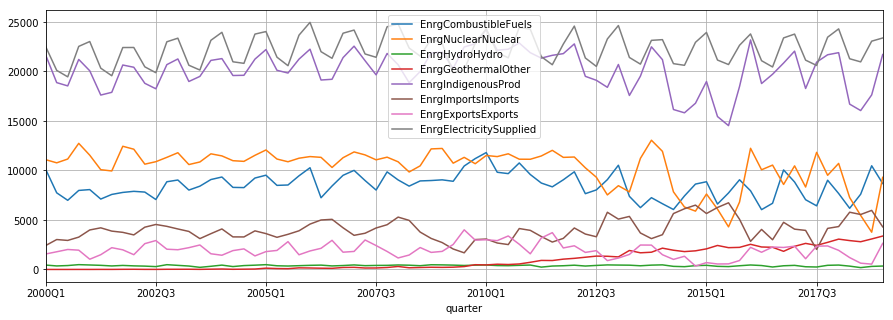

In [10]:
import matplotlib.pyplot as plt
data.plot(x='quarter', y=names[0:8], figsize=(15,5), grid=True)

### Export data frame for further use

Save the DataFrame into a feather file, for use in subsequent notebooks.

In [8]:
import feather
feather.write_dataframe(data, "data_quarterly_prepared.feather")

Now continue with notebook 2.